Exemplo Fuzzy

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Base de Conhecimento

C:\Users\vinicius\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


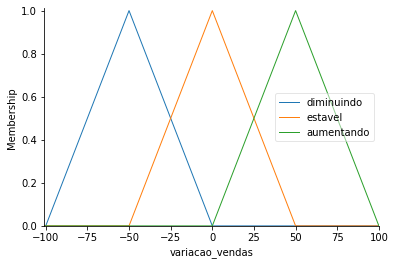

In [2]:
variacao_vendas = ctrl.Antecedent(np.arange(-101, 101, 1), 'variacao_vendas')
variacao_vendas['diminuindo'] = fuzz.trimf(variacao_vendas.universe, [-100, -50, 0])
variacao_vendas['estavel'] = fuzz.trimf(variacao_vendas.universe, [-50, 0 , 50])
variacao_vendas['aumentando'] = fuzz.trimf(variacao_vendas.universe, [0, 50 , 100])

variacao_vendas.view()
plt.show()

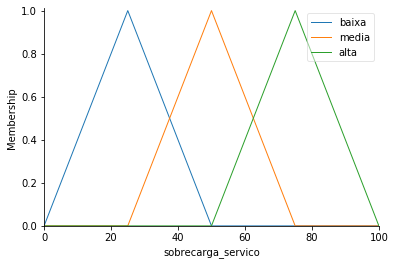

In [4]:
sobrecarga_servico = ctrl.Antecedent(np.arange(0, 101, 1), 'sobrecarga_servico')
sobrecarga_servico['baixa'] = fuzz.trimf(sobrecarga_servico.universe, [0, 25, 50])
sobrecarga_servico['media'] = fuzz.trimf(sobrecarga_servico.universe, [25, 50 , 75])
sobrecarga_servico['alta'] = fuzz.trimf(sobrecarga_servico.universe, [50, 75, 100])

sobrecarga_servico.view()
plt.show()

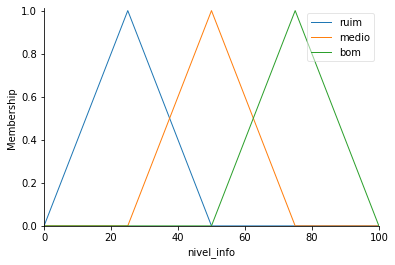

In [5]:
nivel_info = ctrl.Antecedent(np.arange(0, 101, 1), 'nivel_info')
nivel_info['ruim'] = fuzz.trimf(nivel_info.universe, [0, 25, 50])
nivel_info['medio'] = fuzz.trimf(nivel_info.universe, [25, 50 , 75])
nivel_info['bom'] = fuzz.trimf(nivel_info.universe, [50, 75, 100])

nivel_info.view()
plt.show()

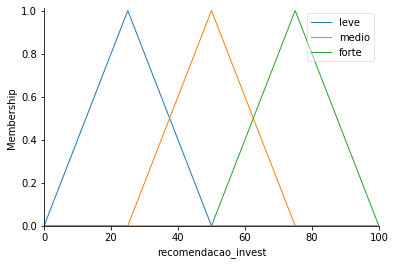

In [6]:
recomendacao_invest = ctrl.Consequent(np.arange(0, 101, 1), 'recomendacao_invest')
recomendacao_invest['leve'] = fuzz.trimf(recomendacao_invest.universe, [0, 25, 50])
recomendacao_invest['medio'] = fuzz.trimf(recomendacao_invest.universe, [25, 50 , 75])
recomendacao_invest['forte'] = fuzz.trimf(recomendacao_invest.universe, [50, 75, 100])

recomendacao_invest.view()
plt.show()

Regras Fuzzy

In [7]:
rule1 = ctrl.Rule(variacao_vendas['aumentando'] & sobrecarga_servico['alta'] & nivel_info['bom'], recomendacao_invest['forte'])
rule2 = ctrl.Rule(variacao_vendas['aumentando'] & sobrecarga_servico['media'] & nivel_info['bom'], recomendacao_invest['medio'])
rule3 = ctrl.Rule(variacao_vendas['aumentando'] & sobrecarga_servico['baixa'] & nivel_info['bom'], recomendacao_invest['leve'])
rule4 = ctrl.Rule(variacao_vendas['aumentando'] & sobrecarga_servico['media'] & nivel_info['ruim'], recomendacao_invest['forte'])

#rule4.view()
#plt.show()

sistema de controle fuzzy

In [8]:
recomenda_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

In [9]:
recomenda = ctrl.ControlSystemSimulation(recomenda_ctrl)

In [13]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
recomenda.input['variacao_vendas'] = -50.0
recomenda.input['sobrecarga_servico'] = 10.0
recomenda.input['nivel_info'] = 10.0

# Crunch the numbers
recomenda.compute()

ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.

60.483870967742035


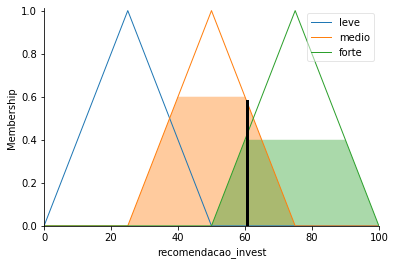

In [11]:
print(recomenda.output['recomendacao_invest'])
recomendacao_invest.view(sim=recomenda)
plt.show()